In [18]:
!pip install kaggle

In [19]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [20]:
!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
!unzip spaceship-titanic.zip

import pandas as pd

df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Archive:  spaceship-titanic.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [22]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [23]:
drop_columns = ['PassengerId', 'Name']
df.drop(drop_columns, axis=1, inplace=True)
test_df.drop(drop_columns, axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

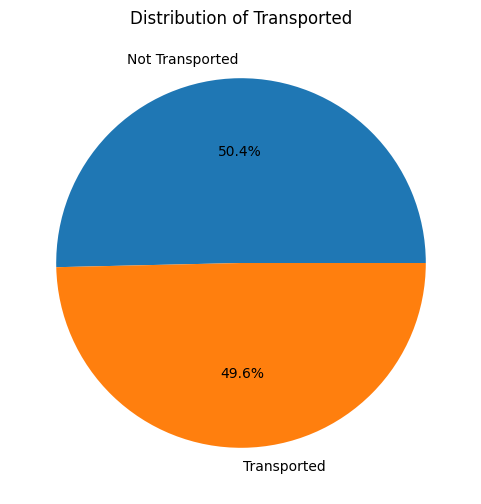

In [25]:
# Pie chart for the target variable `Transported`
plt.figure(figsize=(6, 6))
df['Transported'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Transported', 'Transported'])
plt.title('Distribution of Transported')
plt.ylabel('')
plt.show()

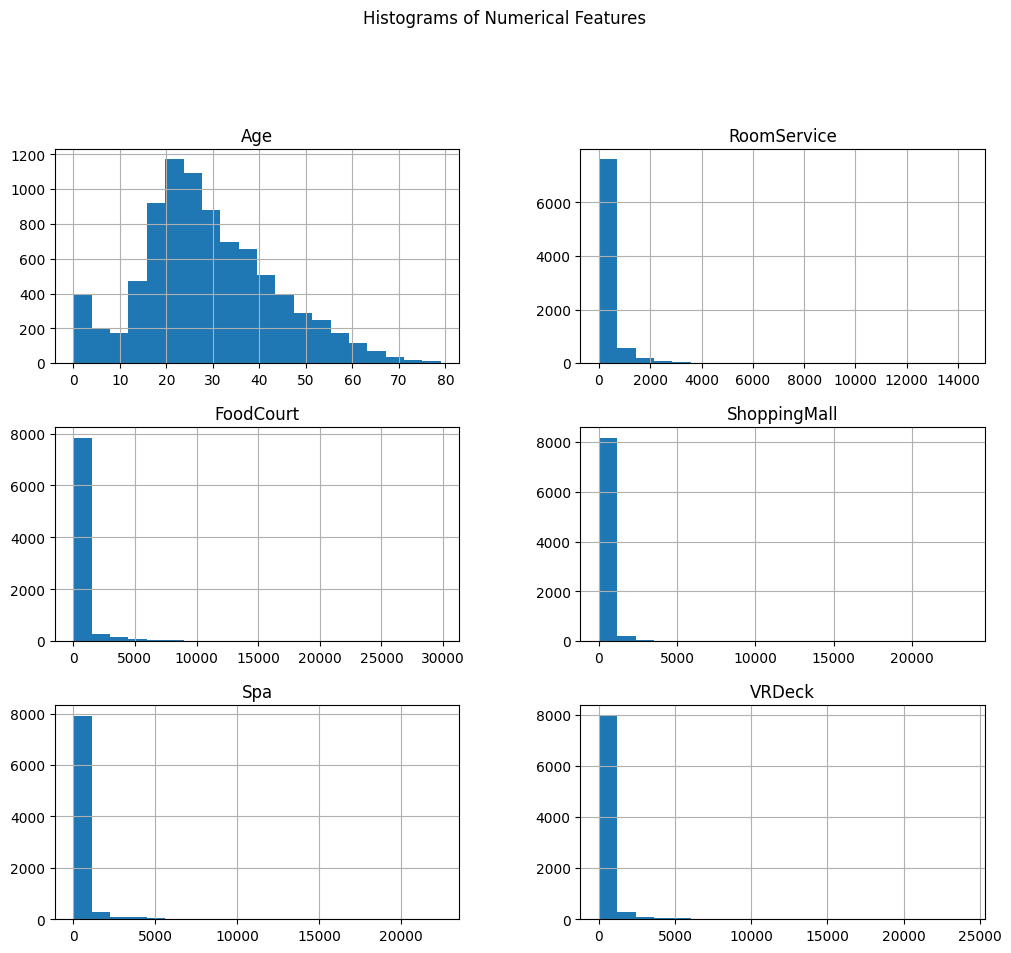

In [26]:
# Histograms for numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

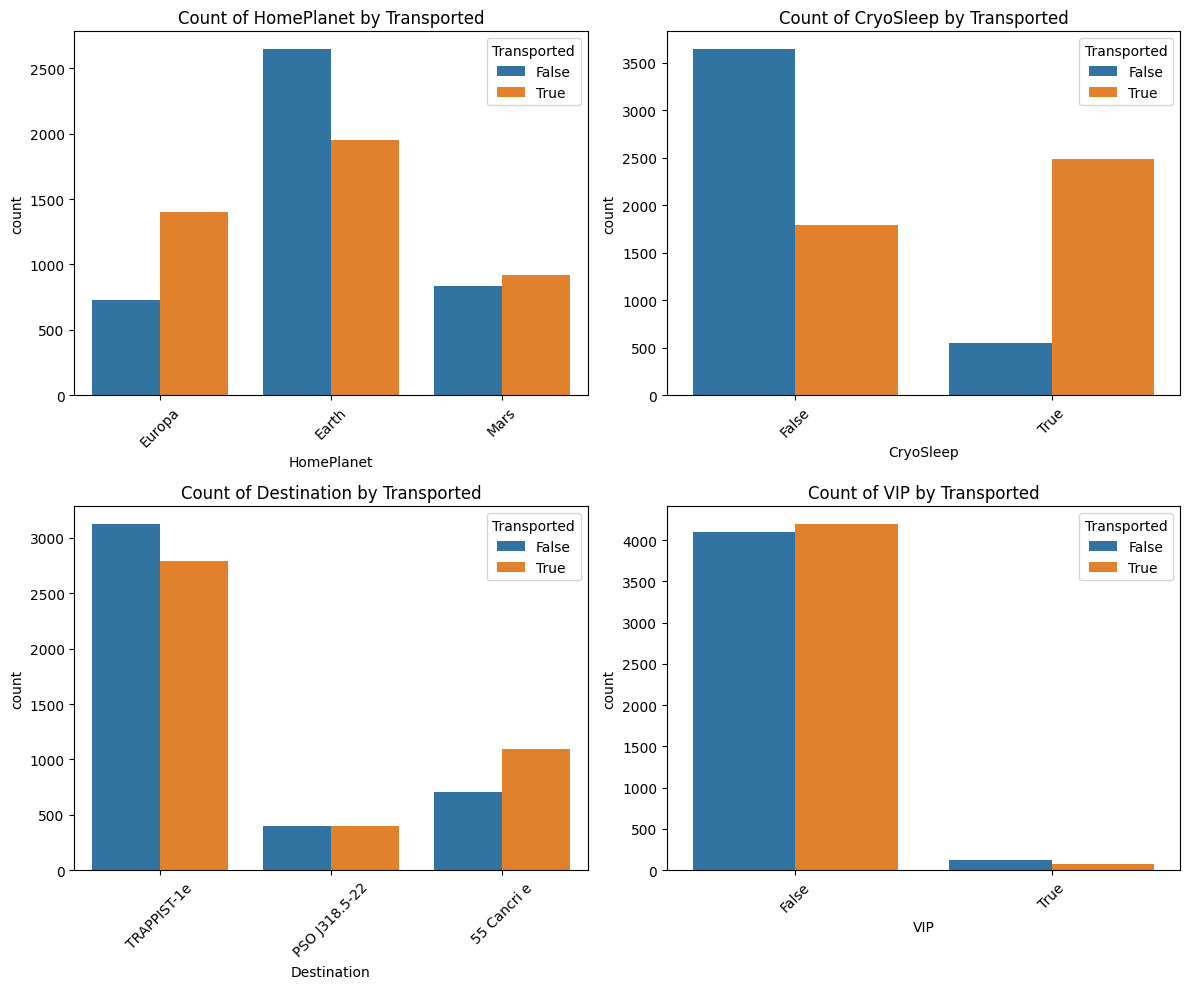

In [27]:
# Bar plots for categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(categorical_features):
    row, col = i // 2, i % 2
    sns.countplot(data=df, x=feature, hue='Transported', ax=axes[row, col])
    axes[row, col].set_title(f'Count of {feature} by Transported')
    axes[row, col].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

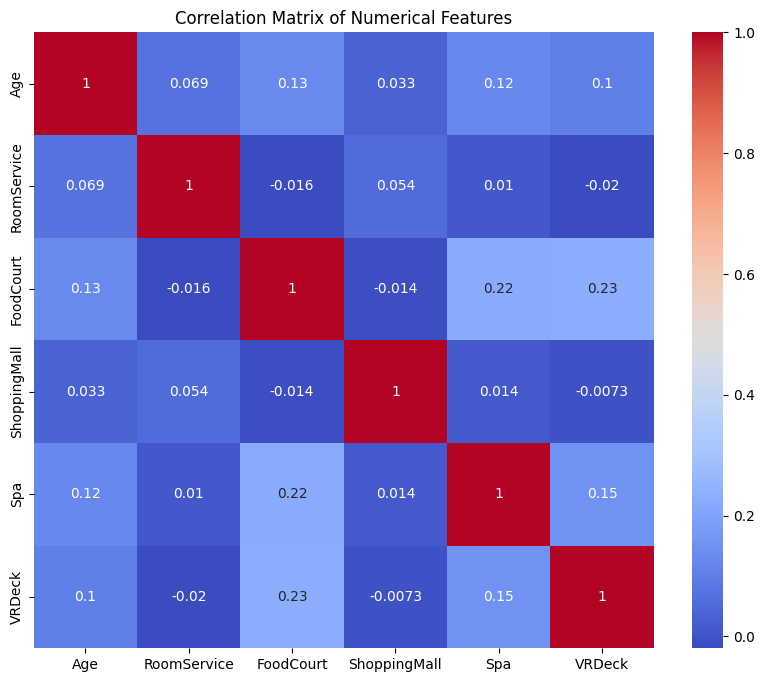

In [30]:
# Heatmap for the correlation matrix of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [31]:
df.Cabin

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S
...,...
8688,A/98/P
8689,G/1499/S
8690,G/1500/S
8691,E/608/S


In [33]:
df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)
df = df.drop('Cabin', axis=1)

print(df.head())

  HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck Cabin_num Side  
0           0.0     0.0     0.0        False    B         0    P  
1          25.0   549.0    44.0         True    F         0    S  
2           0.0  6715.0    49.0        False    A         0    S  
3         371.0  3329.0   193.0        False    A         0    S  
4         151.0   565.0     2.0         True    F         1    S  


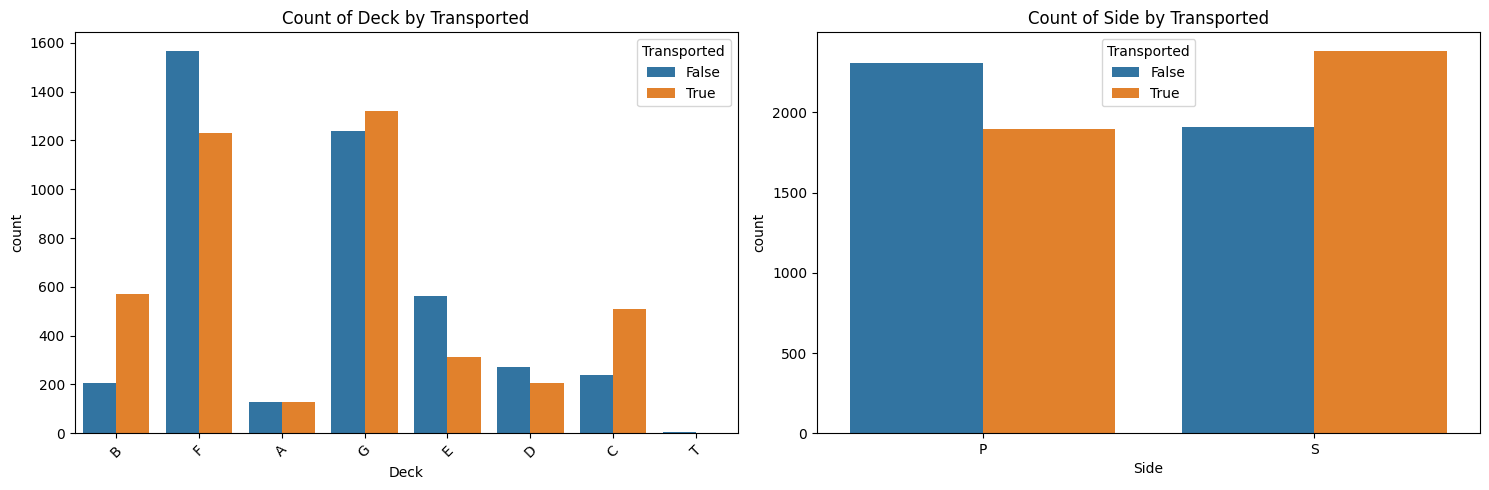

In [34]:
# Bar plots for Deck and Side against Transported
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=df, x='Deck', hue='Transported', ax=axes[0])
axes[0].set_title('Count of Deck by Transported')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Side', hue='Transported', ax=axes[1])
axes[1].set_title('Count of Side by Transported')

plt.tight_layout()
plt.show()

In [37]:
# Separate categorical and numerical columns (excluding 'Transported')
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Impute missing values in categorical columns with the mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # fill with the first mode in case there are multiple modes

# Impute missing values in numerical columns with the median
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Verify that there are no more missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck              0
Cabin_num       199
Side              0
dtype: int64


In [41]:
# Convert `Cabin_num` to numeric, and fill missing values with the median
df['Cabin_num'] = pd.to_numeric(df['Cabin_num'], errors='coerce')
df['Cabin_num'] = df['Cabin_num'].fillna(df['Cabin_num'].median())
df['Cabin_num'] = df['Cabin_num'].astype(int)

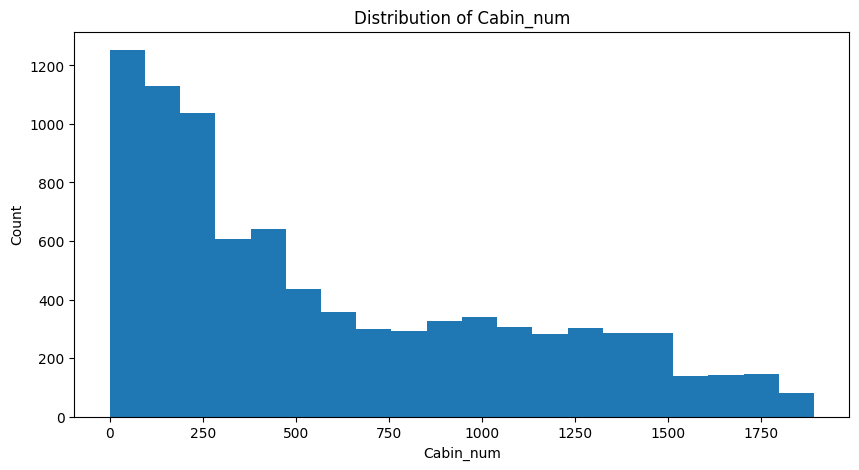

In [42]:
plt.figure(figsize=(10, 5))
plt.hist(df['Cabin_num'], bins=20)
plt.title('Distribution of Cabin_num')
plt.xlabel('Cabin_num')
plt.ylabel('Count')
plt.show()

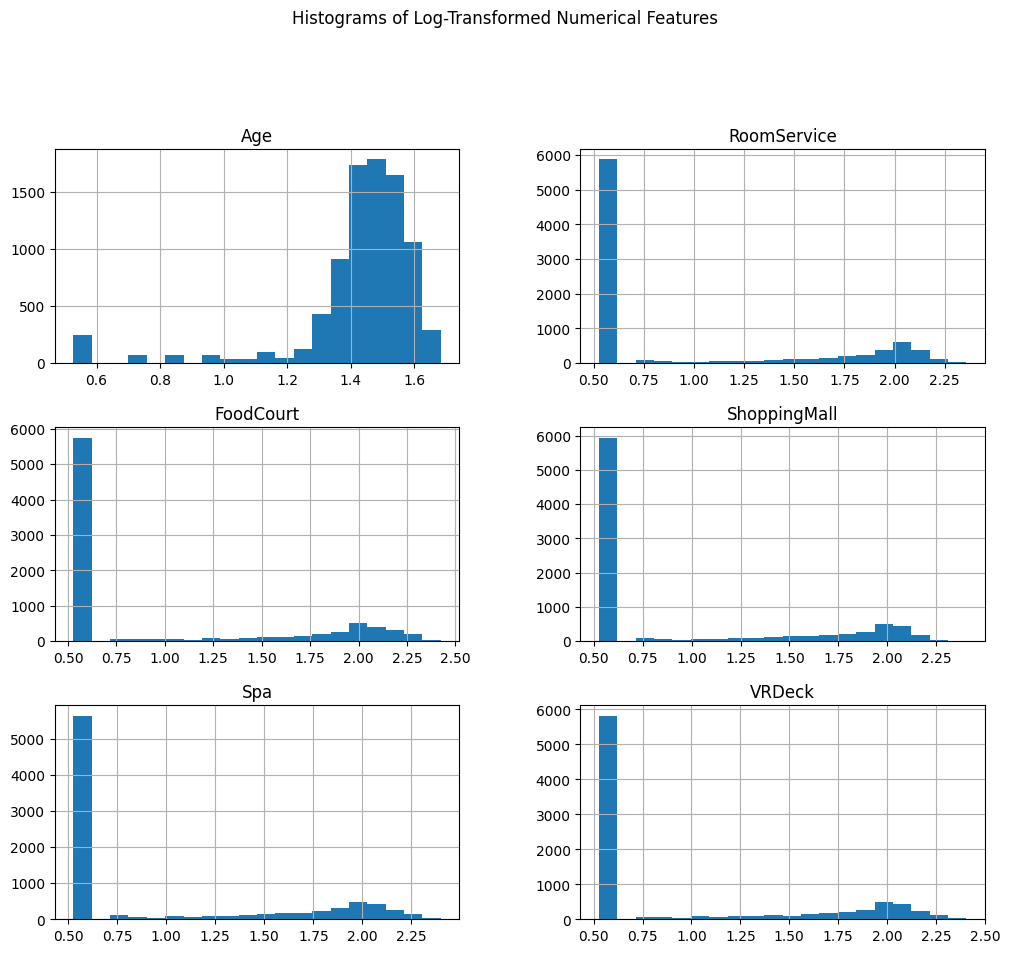

In [43]:
import numpy as np

# Handle zero values: replace 0 with 1
for col in numerical_cols:
    df[col] = df[col].replace(0, 1)

# Apply log transformation
for col in numerical_cols:
    df[col] = np.log1p(df[col])

# Visualize transformed data
df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Log-Transformed Numerical Features', y=1.02)
plt.show()

In [46]:
# Perform one-hot encoding on categorical columns
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify the encoding
print(df.info())

KeyError: "None of [Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side'], dtype='object')] are in the [columns]"

In [47]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [48]:
df.shape

(8693, 22)